# Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
murder_data = pd.read_excel("../Data/murder(2016-2021)/STATE-UT wise murder data(2021-2015)reg.xlsx")

In [6]:
murder_data.tail()

,Unnamed: 0,Sl. No.,State/UT,2015,2016,2017,2018,2019,2020,2021,Region,Region Pop(in_bill)
31,32,32,Delhi,598,528.0,487.0,513.0,521.0,472,459,N,1.024
32,33,33,Jammu and Kashmir,169,142.0,152.0,181.0,119.0,149,136,N,1.024
33,34,34,Ladakh,0,NaN,NaN,NaN,NaN,0,5,N,1.024
34,35,35,Lakshadweep,0,0.0,0.0,1.0,0.0,0,1,S,1.768
35,36,36,Puducherry,33,33.0,25.0,29.0,29.0,39,19,S,1.768


In [9]:
murder_data.fillna(0)
df = murder_data

In [13]:
col_sums = df.sum(axis='index')
type(col_sums)

pandas.core.series.Series

In [14]:
col_sums

Unnamed: 0                                                           638
Sl. No.                                                              666
State/UT               Andhra PradeshArunachal PradeshAssamBiharChhat...
2015                                                               33078
2016                                                             30450.0
2017                                                             28653.0
2018                                                             29017.0
2019                                                             28915.0
2020                                                               29193
2021                                                               29272
Region                      SNENEECWWNNESSCWNENENENEENNNESSNECCESNWNNNSS
Region Pop(in_bill)                                               44.652
dtype: object

In [16]:
 y = col_sums.drop(labels = ['Unnamed: 0','Sl. No.','State/UT','Region','Region Pop(in_bill)'])

In [19]:
y1 = y.tolist()
y1

[33078, 30450.0, 28653.0, 29017.0, 28915.0, 29193, 29272]

In [25]:
x = list(range(2015,2022))
x

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

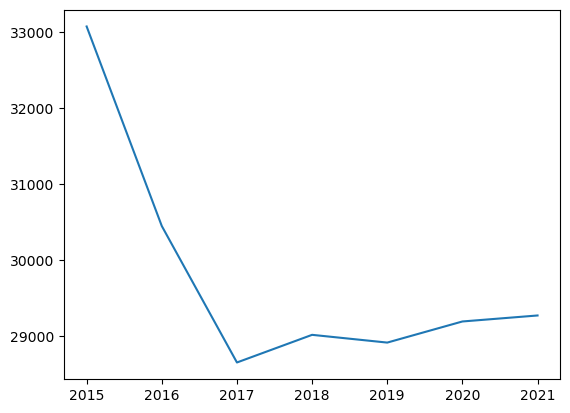

In [66]:
plt.plot(x,y1)

In [80]:
import statsmodels.api as sm

reg = sm.OLS(y1,sm.add_constant(x)).fit()
print(reg.summary())
y2 = np.log(np.array(y1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     4.249
Date:                Sat, 13 Apr 2024   Prob (F-statistic):             0.0943
Time:                        00:39:05   Log-Likelihood:                -58.689
No. Observations:                   7   AIC:                             121.4
Df Residuals:                       5   BIC:                             121.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.015e+06   4.78e+05      2.124      0.0

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [81]:
reg2 = sm.OLS(y2,sm.add_constant(x)).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     4.215
Date:                Sat, 13 Apr 2024   Prob (F-statistic):             0.0953
Time:                        00:39:17   Log-Likelihood:                 13.660
No. Observations:                   7   AIC:                            -23.32
Df Residuals:                       5   BIC:                            -23.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.1510     15.513      2.717      0.0

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [93]:
reg3 = sm.OLS(y1,sm.add_constant(np.exp(-1*np.array(x)))).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 13 Apr 2024   Prob (F-statistic):                nan
Time:                        00:43:06   Log-Likelihood:                -60.842
No. Observations:                   7   AIC:                             123.7
Df Residuals:                       6   BIC:                             123.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.98e+04    588.114     50.665      0.0

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [85]:
y3 = np.exp(42.1510 -0.0158*np.array(x))
y3

array([30151.80295892, 29679.14827691, 29213.90285161, 28755.95053674,
       28305.1770067 , 27861.46972805, 27424.71793139])

In [86]:
y = -488.2143 * np.array(x) + 1.015e+06
y

array([31248.1855, 30759.9712, 30271.7569, 29783.5426, 29295.3283,
       28807.114 , 28318.8997])

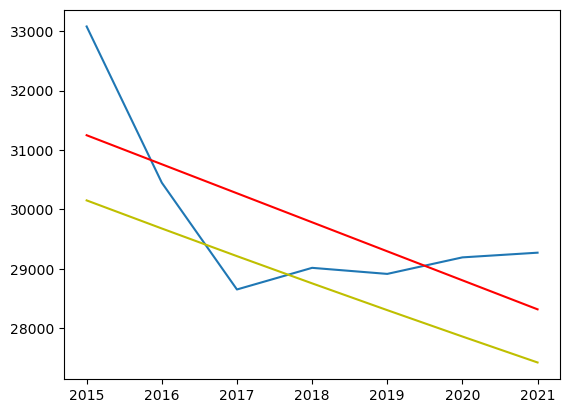

In [88]:
plt.plot(x, y1)
plt.plot(x,y, 'r')
plt.plot(x,y3,'y')